# Breast Cancer Cells Classification

The data was obtained from the UCI Machine Learning Repository.
The data has 10 attributes(features).
The variable we want to classify and predict has two classes:
1. Benign(2)
2. Malignant(4)

Out of the 10 Features, only 9 will be used for the EDA and training the model.
The following features will be used:
1. Clump Thickness
2. Uniformity of Cell Size	
3. Uniformity of Cell Shape	
4. Marginal Adhesion	
5. Single Epithelial Cell Size	
6. Bare Nuclei	
7. Bland Chromatin	
8. Normal Nucleoli	
9. Mitoses

# Data Preprocessing

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
data = pd.read_csv("Data_Classification.csv")
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(683, 11)

In [4]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 58.8 KB


In [6]:
# The sample code number will not be needed. Therefore we will drop the feauture.

In [7]:
data.drop('Sample code number', axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 53.5 KB


In [9]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


The data has no missing values and has 683 records with 11 fields.
Since we do not need to clean the data, the next step is EDA

# Exploratory Data Analysis

In [10]:
pd.crosstab(data['Clump Thickness'], data['Class'])

Class,2,4
Clump Thickness,,
1,136,3
2,46,4
3,92,12
4,67,12
5,83,45
6,15,18
7,1,22
8,4,40
9,0,14


From the cross tabulation, we can see that Clump thicknesses ranging between 1 and 5 have more Benign cases and than the higher the clump thickness the more malignant cases are evident, generally speaking

In [11]:
pd.crosstab(data['Uniformity of Cell Size'], data['Class'])

Class,2,4
Uniformity of Cell Size,,
1,369,4
2,37,8
3,27,25
4,8,30
5,0,30
6,0,25
7,1,18
8,1,27
9,1,5


From the results obtained above, we can see that, for Uniformity of Cell Size values equal to 1, we have the most benign cases. The benign cases are more dominant for Uniformity of Cell size values between 1 and 3. The more the Uniformity increases, the more malignant cases increase.

In [12]:
pd.crosstab(data['Uniformity of Cell Shape'], data['Class'])

Class,2,4
Uniformity of Cell Shape,,
1,344,2
2,51,7
3,30,23
4,12,31
5,2,30
6,2,27
7,2,28
8,1,26
9,0,7


For Uniformity of Cell Shape values ranging from 1 to 3, we have the most benign cases evident. The malignant cases are more prevelant for uniformity of cell shape values increasing from 3 until 10.

In [13]:
pd.crosstab(data['Marginal Adhesion'], data['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,21
3,31,27
4,5,28
5,4,19
6,3,18
7,0,13
8,0,25
9,0,4


The Benign cases are the most evident for a Marginal Adhesion of 1. The cases(benign) are evident from 1 until 3, from there he malignant cases are more evident.

In [14]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,43,1
2,355,21
3,28,43
4,7,41
5,5,34
6,1,39
7,2,9
8,2,19
9,0,2


From the past results we have notices, feature values of 1, correspond to benign cases in the data. However, for the Single Epithelial Cell Size, a value of 2 equalled to the highest number of benign cases. The benign cases are dominant for values from 1 to 3 of the Single Epithelial Cell Size.

In [15]:
pd.crosstab(data['Bare Nuclei'], data['Class'])

Class,2,4
Bare Nuclei,,
1,387,15
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,19
9,0,9


The benign cases are dominant, for bare nuclei values from 1 until 3.The most malignant cases are seen for a bare nuclei of 10.

In [16]:
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,2,4
Bland Chromatin,,
1,148,2
2,153,7
3,125,36
4,7,32
5,4,30
6,1,8
7,6,65
8,0,28
9,0,11


The benign cases are the more prevelant class with respect to this feature. There are more benign cases than there are malignant cases. The highest number of benign cases are evident for values of Bland Chromatin between 1 and 3 summing up to 426 benign cases, with respect to the Bland Chromatin.

In [17]:
pd.crosstab(data['Normal Nucleoli'], data['Class'])

Class,2,4
Normal Nucleoli,,
1,391,41
2,30,6
3,11,31
4,1,17
5,2,17
6,4,18
7,2,14
8,3,20
9,0,15


There are more benign cases,when considering the Normal Nucleoli than there are malignant cases. However, from Normal Nucleoli values from 3 until 10 there are mostly malignant cases. Normal Nucleoli = 1 correspond to 391 benigns cases.

In [18]:
pd.crosstab(data['Mitoses'], data['Class'])

Class,2,4
Mitoses,,
1,431,132
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


The lower the Mitosis of a cell, the more benign cases there are. A Mitosis = 1 values corresponds to 431 benign cases. However there are 132 Malignant corresponding to the same value of Mitosis. Mitosis values greater than 1 correspond to more malignant cases.

It was noted all the features have values rangging from 1 to 10. A general observation: was that values of 1 of all the features correspondes to a high number of benign cases. The higher the value (more towards 10), malignant cases were dominant.

In [19]:
# Number of cases for each Class
data['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

The above gives a results of the number of cases for each class. There more benign cases.

In [20]:
#Percentage of each Class in the data
benign_percentage = (444/683)*100
print("Percentage of people who survived: {0:.2f} %".format(benign_percentage))
malignant_percentage = (239/683)*100
print("Percentage of people who survived: {0:.2f} %".format(malignant_percentage))

Percentage of people who survived: 65.01 %
Percentage of people who survived: 34.99 %


AxesSubplot(0.125,0.125;0.775x0.755)


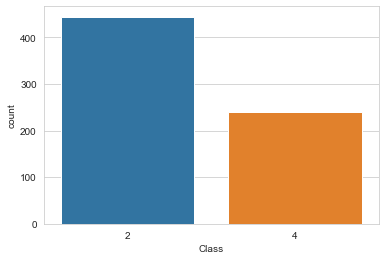

In [21]:
# The above results observed visually
sns.set_style('whitegrid')
print(sns.countplot(x = 'Class', data = data))

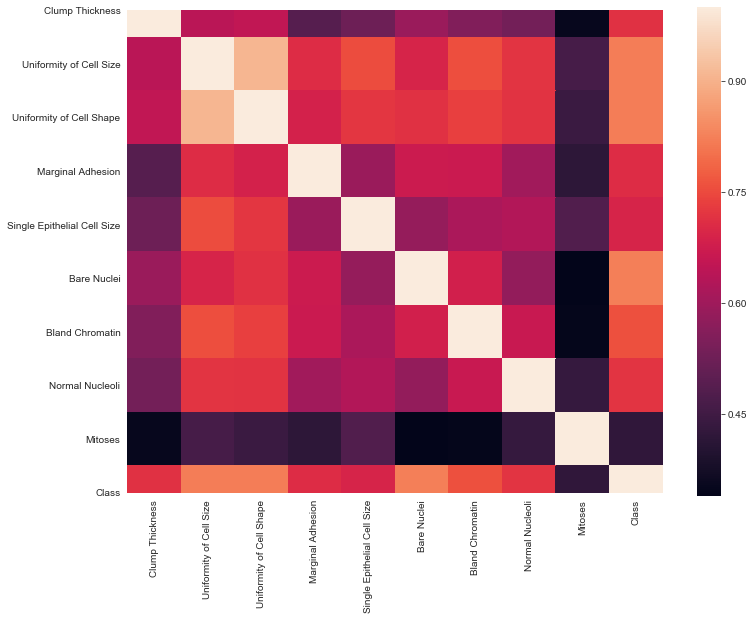

In [22]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

From the correlation matrix wecan seethe following insights:
1. The Unifomity of the Cell Size and Shape have a strong correlation.
2. The Uniformity of the Cell Size has a strong correlation with the class of the cell.
3. The Uniformity of the Cell Shape has a strong correlation with the class of the cell.
4. The Mitosis of the cells have now correlation with the cell class and with the Bare Nuclei and Bland Chromatin.
5. The Bare Nuclei has a relatively strong correlation to the cell class.
6. The Unifomity of Cell Size has a correlation to the Single Epithelial Cell Size and Bland Chromatin.

More EDA can be done, more thought needs to be put in to try and find more insights from the dataset, which can lead to a better understanding of the data.

# Training and Evaluating the model

The different classification models will be trained and evaluated.

In [23]:
# Split the data into a matrix of features (X) and a vector of labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [24]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [25]:
#Fit the different models to the data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Logistic Regression
clf_1 = LogisticRegression(random_state = 0)
clf_1.fit(X_train, y_train)

#KNN
clf_2 = KNeighborsClassifier(n_neighbors = 5,metric ='minkowski', p = 2)
clf_2.fit(X_train, y_train)

#SVM
clf_3 = SVC(kernel = 'rbf', random_state = 0)
clf_3.fit(X_train, y_train)

#Naive Bayes
clf_4 = GaussianNB()
clf_4.fit(X_train, y_train)

# Decision Trees
clf_5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf_5.fit(X_train, y_train)

C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

There are more models to try and also to fine tune the hyperparamters of the models used here.

In [26]:
# Get the predictions of the models
y_pred1 = clf_1.predict(X_test)
y_pred2 = clf_2.predict(X_test)
y_pred3 = clf_3.predict(X_test)
y_pred4 = clf_4.predict(X_test)
y_pred5 = clf_5.predict(X_test)

We will now evaluate the trained models using three metrics:
1. Accuracy Score
2. Cross Validation Score
3. Confusion Matrix

In [27]:
# 1. Accuracy Scores
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_pred1)
score2 = accuracy_score(y_test, y_pred2)
score3 = accuracy_score(y_test, y_pred3)
score4 = accuracy_score(y_test, y_pred4)
score5 = accuracy_score(y_test, y_pred5)

print("Accuracy Score (Logistic Regression): {0:.2f} %".format(score1*100))
print("Accuracy Score (KNN): {0:.2f} %".format(score2*100))
print("Accuracy Score (SVM (kernel)): {0:.2f} %".format(score3*100))
print("Accuracy Score (Naive Bayes): {0:.2f} %".format(score4*100))
print("Accuracy Score (Decision Trees): {0:.2f} %".format(score5*100))

Accuracy Score (Logistic Regression): 94.89 %
Accuracy Score (KNN): 97.08 %
Accuracy Score (SVM (kernel)): 95.62 %
Accuracy Score (Naive Bayes): 94.89 %
Accuracy Score (Decision Trees): 95.62 %


In [28]:
# 2. Cross validation scores
from sklearn.model_selection import cross_val_score

cscore1 = cross_val_score(estimator = clf_1, X = X_train, y = y_train, cv = 10)
cscore2 = cross_val_score(estimator = clf_2, X = X_train, y = y_train, cv = 10)
cscore3 = cross_val_score(estimator = clf_3, X = X_train, y = y_train, cv = 10)
cscore4 = cross_val_score(estimator = clf_4, X = X_train, y = y_train, cv = 10)
cscore5 = cross_val_score(estimator = clf_5, X = X_train, y = y_train, cv = 10)

print("K-Fold Cross Validation Accuracy Score (Logistic Regression): {0:.2f} %".format(cscore1.mean()*100))
print("K-Fold Cross Validation STD (LR): {0:.2f} %".format(cscore1.std()*100))

print("K-Fold Cross Validation Accuracy Score (KNN) : {0:.2f} %".format(cscore2.mean()*100))
print("K-Fold Cross Validation STD (KNN): {0:.2f} %".format(cscore2.std()*100))

print("K-Fold Cross Validation Accuracy Score (SVM (Kernel)): {0:.2f} %".format(cscore3.mean()*100))
print("K-Fold Cross Validation STD (SVM(Kernel)): {0:.2f} %".format(cscore3.std()*100))

print("K-Fold Cross Validation Accuracy Score (Naive Bayes): {0:.2f} %".format(cscore4.mean()*100))
print("K-Fold Cross Validation STD (Naive_Bayes): {0:.2f} %".format(cscore4.std()*100))

print("K-Fold Cross Validation Accuracy Score (Decision Trees): {0:.2f} %".format(cscore5.mean()*100))
print("K-Fold Cross Validation STD (Decision Trees): {0:.2f} %".format(cscore5.std()*100))


C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

K-Fold Cross Validation Accuracy Score (Logistic Regression): 96.70 %
K-Fold Cross Validation STD (LR): 2.43 %
K-Fold Cross Validation Accuracy Score (KNN) : 97.44 %
K-Fold Cross Validation STD (KNN): 1.85 %
K-Fold Cross Validation Accuracy Score (SVM (Kernel)): 95.42 %
K-Fold Cross Validation STD (SVM(Kernel)): 1.87 %
K-Fold Cross Validation Accuracy Score (Naive Bayes): 96.51 %
K-Fold Cross Validation STD (Naive_Bayes): 2.25 %
K-Fold Cross Validation Accuracy Score (Decision Trees): 94.33 %
K-Fold Cross Validation STD (Decision Trees): 2.63 %


In [29]:
# Confusion Marix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: Logistic Regression')
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

Confusion Matrix: Logistic Regression
[[84  3]
 [ 4 46]]


In [30]:
print('Confusion Matrix: KNN')
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

Confusion Matrix: KNN
[[84  3]
 [ 1 49]]


In [31]:
print('Confusion Matrix: SVM (Kernel)')
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

Confusion Matrix: SVM (Kernel)
[[81  6]
 [ 0 50]]


In [32]:
print('Confusion Matrix: Naive_Bayes')
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

Confusion Matrix: Naive_Bayes
[[80  7]
 [ 0 50]]


In [33]:
print('Confusion Matrix: Decision Trees')
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

Confusion Matrix: Decision Trees
[[84  3]
 [ 3 47]]


The KNN has the best results.

# Make a single prediction using KNN model

We will use the following values to make the predictions:
1. Clump Thickness = 2
2. Uniformity of Cell Size = 3	
3. Uniformity of Cell Shape = 4	
4. Marginal Adhesion = 5	
5. Single Epithelial Cell Size = 2	
6. Bare Nuclei = 1	
7. Bland Chromatin = 4	
8. Normal Nucleoli = 6	
9. Mitoses = 9

In [34]:
single_prediction = clf_2.predict([[2, 3, 4, 5, 2, 1, 4, 6, 9]])

if single_prediction == 2:
    
    print('The Cell is Benign')
else:
    print('The Cell is Malignant')

The Cell is Benign


We will change the cell size and cell shape to see its effects on the model:
1. Uniformity of Cell Size = 8
2. Uniformity of Cell Shape = 9

In [35]:
single_prediction = clf_2.predict([[2, 8, 9, 5, 2, 1, 4, 6, 9]])

if single_prediction == 2:
    
    print('The Cell is Benign')
else:
    print('The Cell is Malignant')

The Cell is Malignant


As expected from the results observed in the EDA. The Cell size and shape have a strong impact on the class of the cell.

A last experiement will be to try and confuse the model by inputing cell size and shape values in the middle range (4-6) 

In [36]:
single_prediction = clf_2.predict([[2, 5, 4, 5, 2, 1, 4, 6, 9]])

if single_prediction == 2:
    
    print('The Cell is Benign')
else:
    print('The Cell is Malignant')

The Cell is Benign
